In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from modules.Utils.utils import DummyLogger
import sqlite3
from tqdm import tqdm
import time
import subprocess
import matplotlib.dates as mdates
from datetime import datetime
from astropy.table import Table
from tqdm.notebook import tqdm_notebook
from modules.quicklook.src.analyze_time_series import AnalyzeTimeSeries
!pip install seaborn
import seaborn as sns

from matplotlib.ticker import FuncFormatter
def format_thousands(value, tick_number):
    return f'{int(value / 1000)}k'

%matplotlib inline

In [2]:
db_path = 'kpf_ts_oct2024_v2.db' # name of database file
myTS = AnalyzeTimeSeries(db_path=db_path)

INFO: Starting AnalyzeTimeSeries
INFO: Jupyter Notebook environment detected.
INFO: Path of database file: /code/KPF-Pipeline/kpf_ts_oct2024_v2.db
INFO: Base data directory: /data/L0
INFO: Primary table 'kpfdb' created/updated successfully.
INFO: Metadata table 'kpfdb_metadata' created/updated successfully.
INFO: Summary: 14928 obs x 1188 cols over 27 days in 20241001-20241027; updated 2025-02-06 18:56:34


In [3]:
conn = sqlite3.connect(db_path)
cursor = conn.cursor()
cursor.execute(
    """
    SELECT keyword, description
    FROM kpfdb_metadata
    WHERE source = "L2 RV Extension"
    ORDER BY keyword;
    """)
rows = cursor.fetchall()
keywords = [f'"{keyword}"' for keyword, description in rows if keyword]

query = f"""SELECT ObsID, OBJECT, [DATE-MID], NOTJUNK, GOODREAD, CCFBCV, CCFBJD, L0_filename,   
    {', '.join(keywords)} 
    FROM kpfdb
    WHERE NOTJUNK = 1.0 AND OBJECT NOT LIKE '%autocal%' AND Source = 'Star'"""
df = pd.read_sql_query(query, conn)
conn.close()
df

,ObsID,OBJECT,DATE-MID,NOTJUNK,GOODREAD,CCFBCV,CCFBJD,L0_filename,BCRV00,BCRV01,...,RVY57,RVY58,RVY59,RVY60,RVY61,RVY62,RVY63,RVY64,RVY65,RVY66
0,KP.20241003.18211.46,TOI-1386,2024-10-03T05:06:01.466,1,None,-0.131280,2.460587e+06,KP.20241003.18211.46.fits,-0.131263143448323,-0.13131158144219,...,0.0,-72.6963217858103,47.0800276600691,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,KP.20241003.17479.33,TOI-1386,2024-10-03T04:53:49.337,1,None,-0.118955,2.460587e+06,KP.20241003.17479.33.fits,-0.118941793158118,-0.118956615465355,...,0.0,14.3595861814842,-45.2680650110629,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,KP.20241003.17827.92,TOI-1386,2024-10-03T04:59:37.931,1,None,-0.124846,2.460587e+06,KP.20241003.17827.92.fits,-0.1247911073227,-0.124791291647548,...,0.0,-77.3812461244719,-66.8489573381284,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,KP.20241003.18560.27,TOI-1386,2024-10-03T05:11:50.282,1,None,-0.137395,2.460587e+06,KP.20241003.18560.27.fits,-0.13736267646374,-0.137361142087524,...,0.0,57.258071912019,-23.5175851789336,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,KP.20241003.18908.70,TOI-1386,2024-10-03T05:17:38.707,1,None,-0.143564,2.460587e+06,KP.20241003.18908.70.fits,-0.14351051553664,-0.14353846890906,...,0.0,46.7299964692225,-11.3128051527031,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,KP.20241026.49181.48,52711,2024-10-26T13:44:04.989,1,None,28.050886,2.460610e+06,KP.20241026.49181.48.fits,28.0508725713154,28.0508761366599,...,0.0,22.7169217062974,-38.2785349674322,0.0,0.0,0.0,0.0,0.0,0.0,0.0
776,KP.20241026.49992.37,HIP37217,2024-10-26T14:04:50.091,1,None,22.411861,2.460610e+06,KP.20241026.49992.37.fits,22.4112307340587,22.4111530764493,...,0.0,-1.92022982588995,65.4683625601405,0.0,0.0,0.0,0.0,0.0,0.0,0.0
777,KP.20241026.51667.01,44219,2024-10-26T14:22:18.551,1,None,21.881098,2.460610e+06,KP.20241026.51667.01.fits,21.8810467301081,21.8810168500451,...,0.0,-112.696855858522,15.7976897824488,0.0,0.0,0.0,0.0,0.0,0.0,0.0
778,KP.20241026.52204.35,HAT-P-20,2024-10-26T14:37:01.365,1,None,29.100836,2.460610e+06,KP.20241026.52204.35.fits,29.0989274075178,29.0991451106733,...,0.0,30.9935161416225,0.353441354465979,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df = df.rename(columns={'CCFBJD': 'CCFBJD_Avg'})

#identifying columns to reshape (the ones ending with digits)
columns_to_reshape = [col for col in df.columns if col[-2:].isdigit()]

#extracting ORDER and prefix from the column names
order_list = []
prefix_list = []
for col in columns_to_reshape:
    prefix = col[:-2]  # Extract the prefix (e.g., 'BCRV')
    order = col[-2:]   # Extract the order (e.g., '00')
    prefix_list.append(prefix)
    order_list.append(order)

#creating new dataframe with ORDER 
unique_orders = sorted(set(order_list))  # Unique ORDER values
new_df = pd.DataFrame({
    'ORDER': unique_orders,
})

#add preserved columns to the new dataframe
preserved_columns = ['ObsID', 'OBJECT', 'DATE-MID', 'CCFBCV', 'CCFBJD_Avg', 'L0_filename']
temp_df = df[preserved_columns].assign(key=1)
new_df = new_df.assign(key=1).merge(temp_df, on='key', how='outer').drop('key', axis=1)

#adding columns for each unique prefix
unique_prefixes = set(prefix_list)
for prefix in unique_prefixes:
    new_df[prefix] = None  # Initialize the column with None

#populating the new DataFrame with values from the original DataFrame
for i, col in enumerate(columns_to_reshape):
    prefix = prefix_list[i]
    order = order_list[i]
    new_df.loc[new_df['ORDER'] == order, prefix] = df[col].values

#sorting the DataFrame by preserved columns and ORDER
new_df = new_df.sort_values(by=preserved_columns + ['ORDER']).reset_index(drop=True)

new_df

,ORDER,ObsID,OBJECT,DATE-MID,CCFBCV,CCFBJD_Avg,L0_filename,CCFW,RV1,RVC,RV3,ERVC,RV2,RVY,CCFBJD,ERVS,RVS,ERVY,BCRV
0,00,KP.20241003.16753.55,166620,2024-10-03T04:43:23.562,-14.018317,2.460587e+06,KP.20241003.16753.55.fits,0.0,0.0,0.0,0.0,0.000959147007101243,0.0,0.0,2460586.69730111,0.00110266901671145,0.0,0.0,-14.0183402671858
1,01,KP.20241003.16753.55,166620,2024-10-03T04:43:23.562,-14.018317,2.460587e+06,KP.20241003.16753.55.fits,0.0,0.0,0.0,0.0,0.00068750598063121,0.0,0.0,2460586.69730067,0.000993572342548132,0.0,0.0,-14.0183393617707
2,02,KP.20241003.16753.55,166620,2024-10-03T04:43:23.562,-14.018317,2.460587e+06,KP.20241003.16753.55.fits,0.0,0.0,0.0,0.0,0.000819608460611548,0.0,0.0,2460586.6973004,0.000760294783271666,0.0,0.0,-14.0183388131896
3,03,KP.20241003.16753.55,166620,2024-10-03T04:43:23.562,-14.018317,2.460587e+06,KP.20241003.16753.55.fits,0.0,0.0,0.0,0.0,0.000694978398249086,0.0,0.0,2460586.69729784,0.000790615058427656,0.0,0.0,-14.0183335449538
4,04,KP.20241003.16753.55,166620,2024-10-03T04:43:23.562,-14.018317,2.460587e+06,KP.20241003.16753.55.fits,0.0,0.0,0.0,0.0,0.000569866333402708,0.0,0.0,2460586.6972992,0.00073198094748955,0.0,0.0,-14.0183363339905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52255,62,KP.20241026.53485.57,88230,2024-10-26T14:53:55.582,24.197612,2.460610e+06,KP.20241026.53485.57.fits,0.0,0.0,0.00914154823921011,0.0,0.000475514395909022,0.0,0.0,2460610.12080313,0.0,0.0,0.0,24.1976159080732
52256,63,KP.20241026.53485.57,88230,2024-10-26T14:53:55.582,24.197612,2.460610e+06,KP.20241026.53485.57.fits,0.0,0.0,-0.000684368049018988,0.0,0.000440153840225037,0.0,0.0,2460610.12079732,0.0,0.0,0.0,24.1976221527514
52257,64,KP.20241026.53485.57,88230,2024-10-26T14:53:55.582,24.197612,2.460610e+06,KP.20241026.53485.57.fits,0.0,0.0,0.0114146858877544,0.0,0.00086853335713448,0.0,0.0,2460610.12079346,0.0,0.0,0.0,24.1976263076159
52258,65,KP.20241026.53485.57,88230,2024-10-26T14:53:55.582,24.197612,2.460610e+06,KP.20241026.53485.57.fits,0.0,0.0,-0.00788511566110868,0.0,0.00080678890915096,0.0,0.0,2460610.12079598,0.0,0.0,0.0,24.197623595531


In [5]:
new_df.loc[:, 'BCRV'] = new_df['BCRV'].astype(float) * 1000
new_df.loc[:, 'BCRV_Corr'] = new_df['BCRV'] - (new_df['CCFBCV'].astype(float)*1000)
new_df.loc[:, 'CCFBJ_Corr'] = (new_df['CCFBJD'].astype(float) - new_df['CCFBJD_Avg'].astype(float)) * 86400
new_df['ORDER'] = new_df['ORDER'].astype(str)

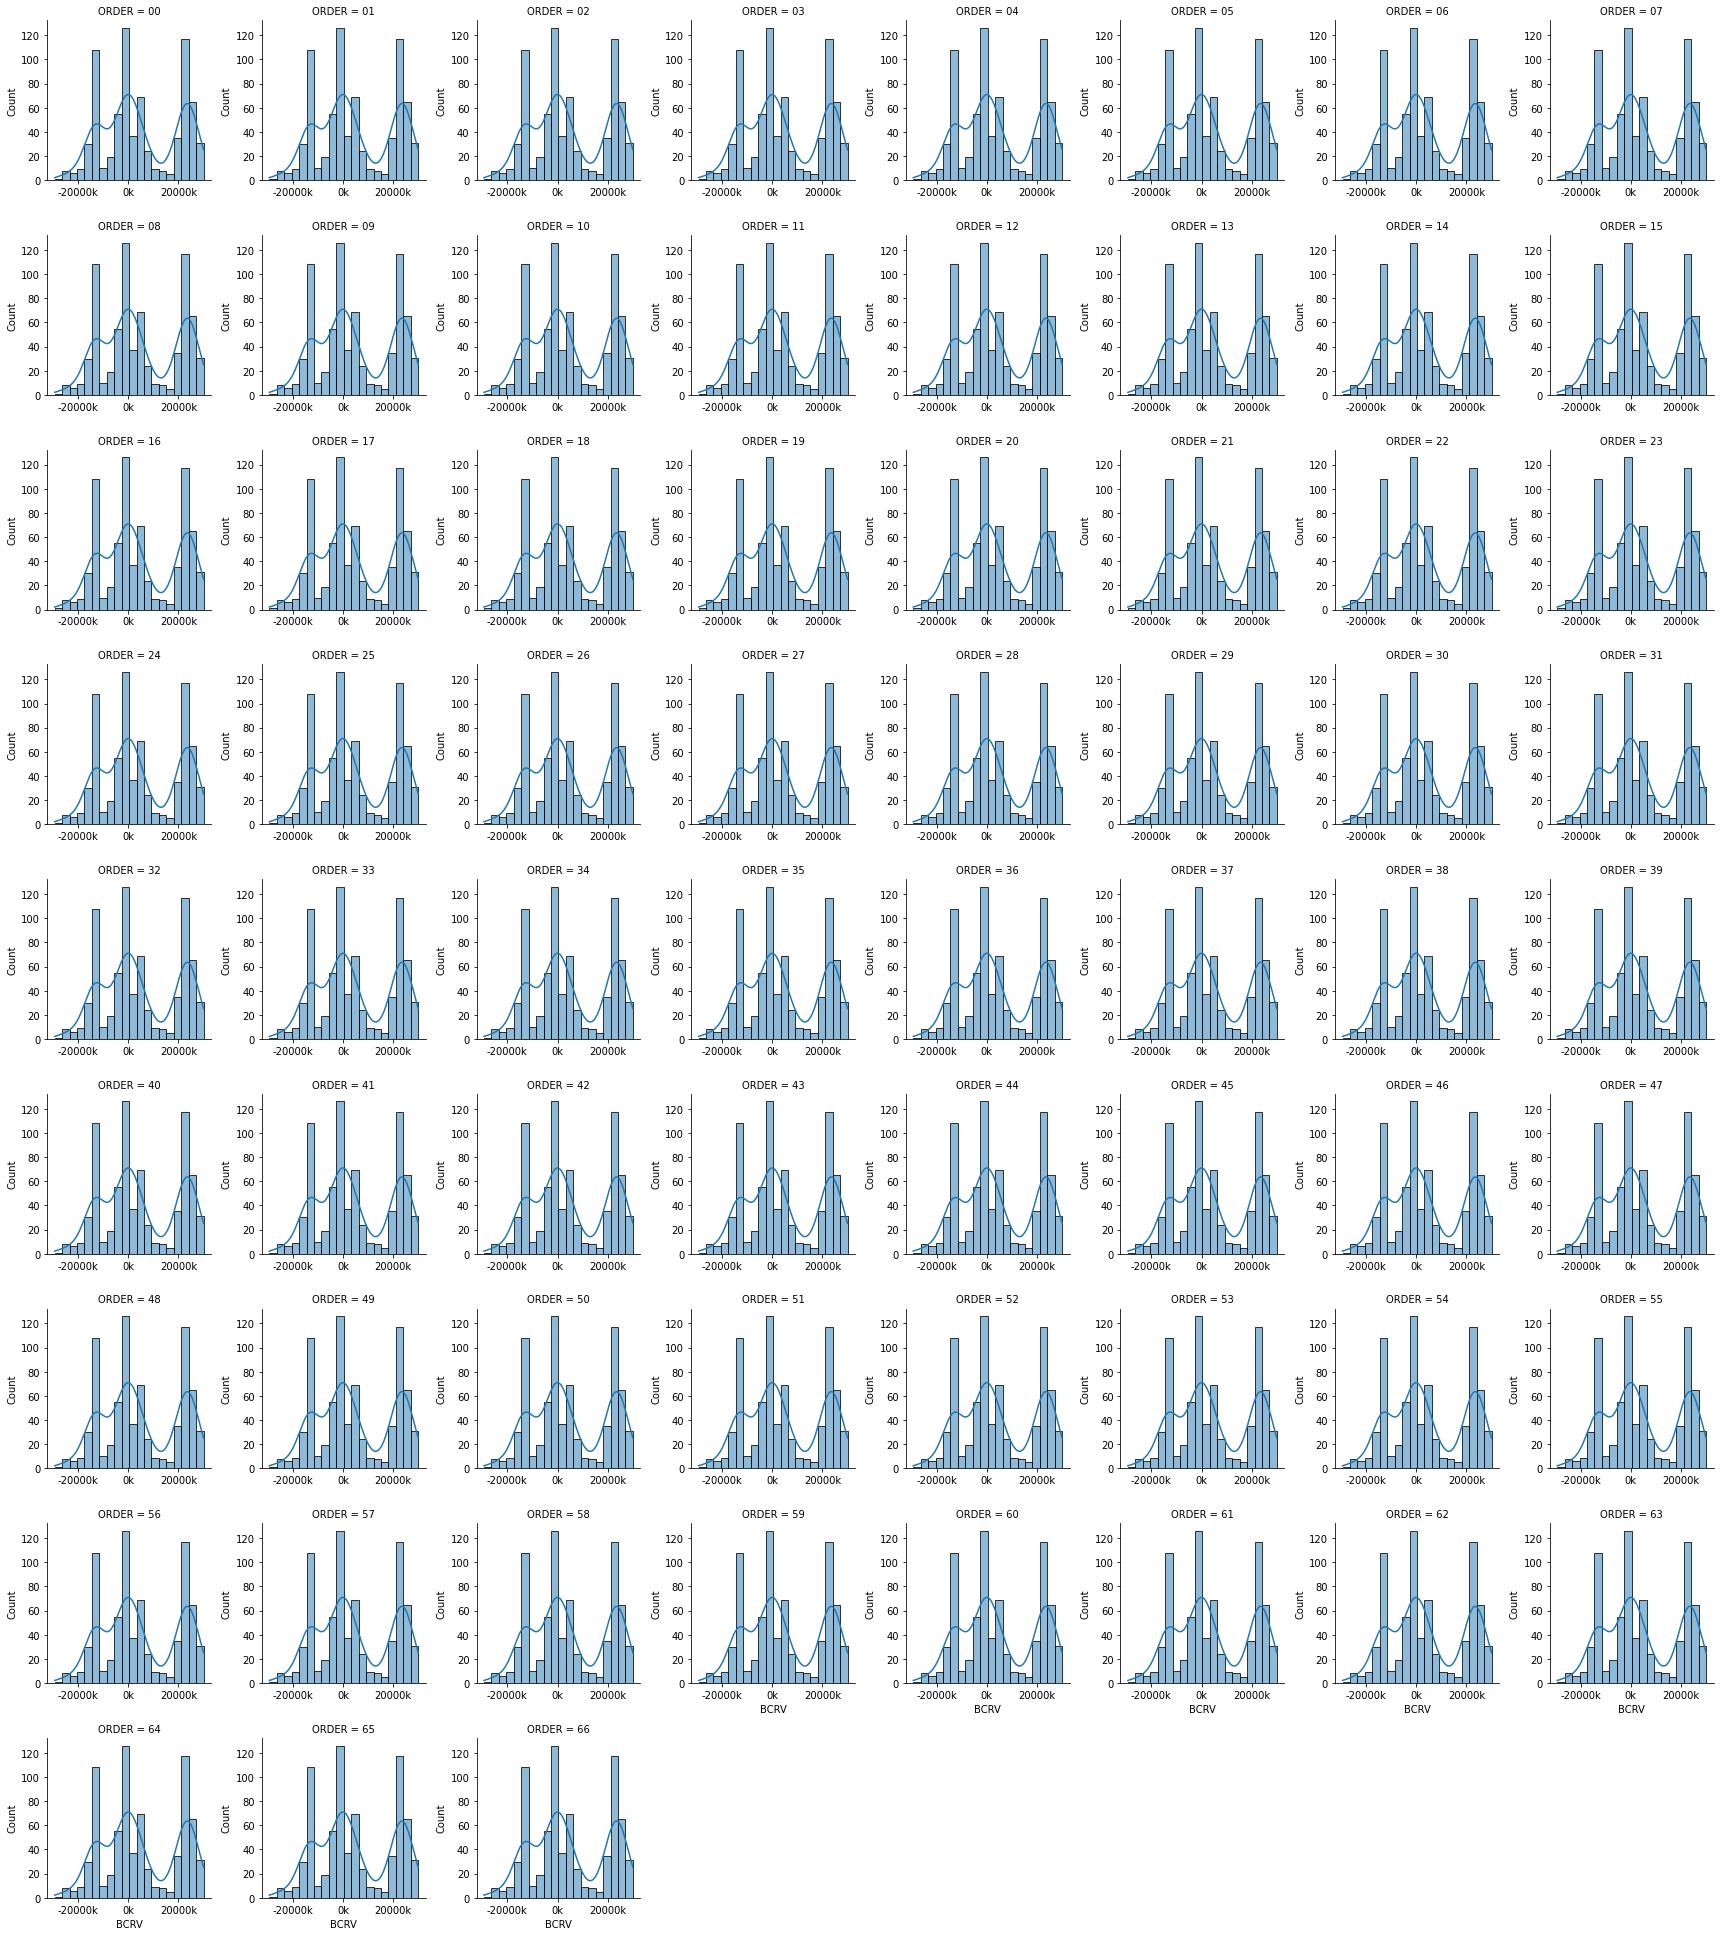

In [6]:
new_df.loc[:, 'BCRV'] = new_df['BCRV'].astype(float) * 1000
new_df['ORDER'] = new_df['ORDER'].astype(str)

g = sns.FacetGrid(new_df, col="ORDER", col_wrap=8, sharex=False, sharey=False)
g.map(sns.histplot, "BCRV", bins=20, kde=True)

for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(FuncFormatter(format_thousands))

plt.show()

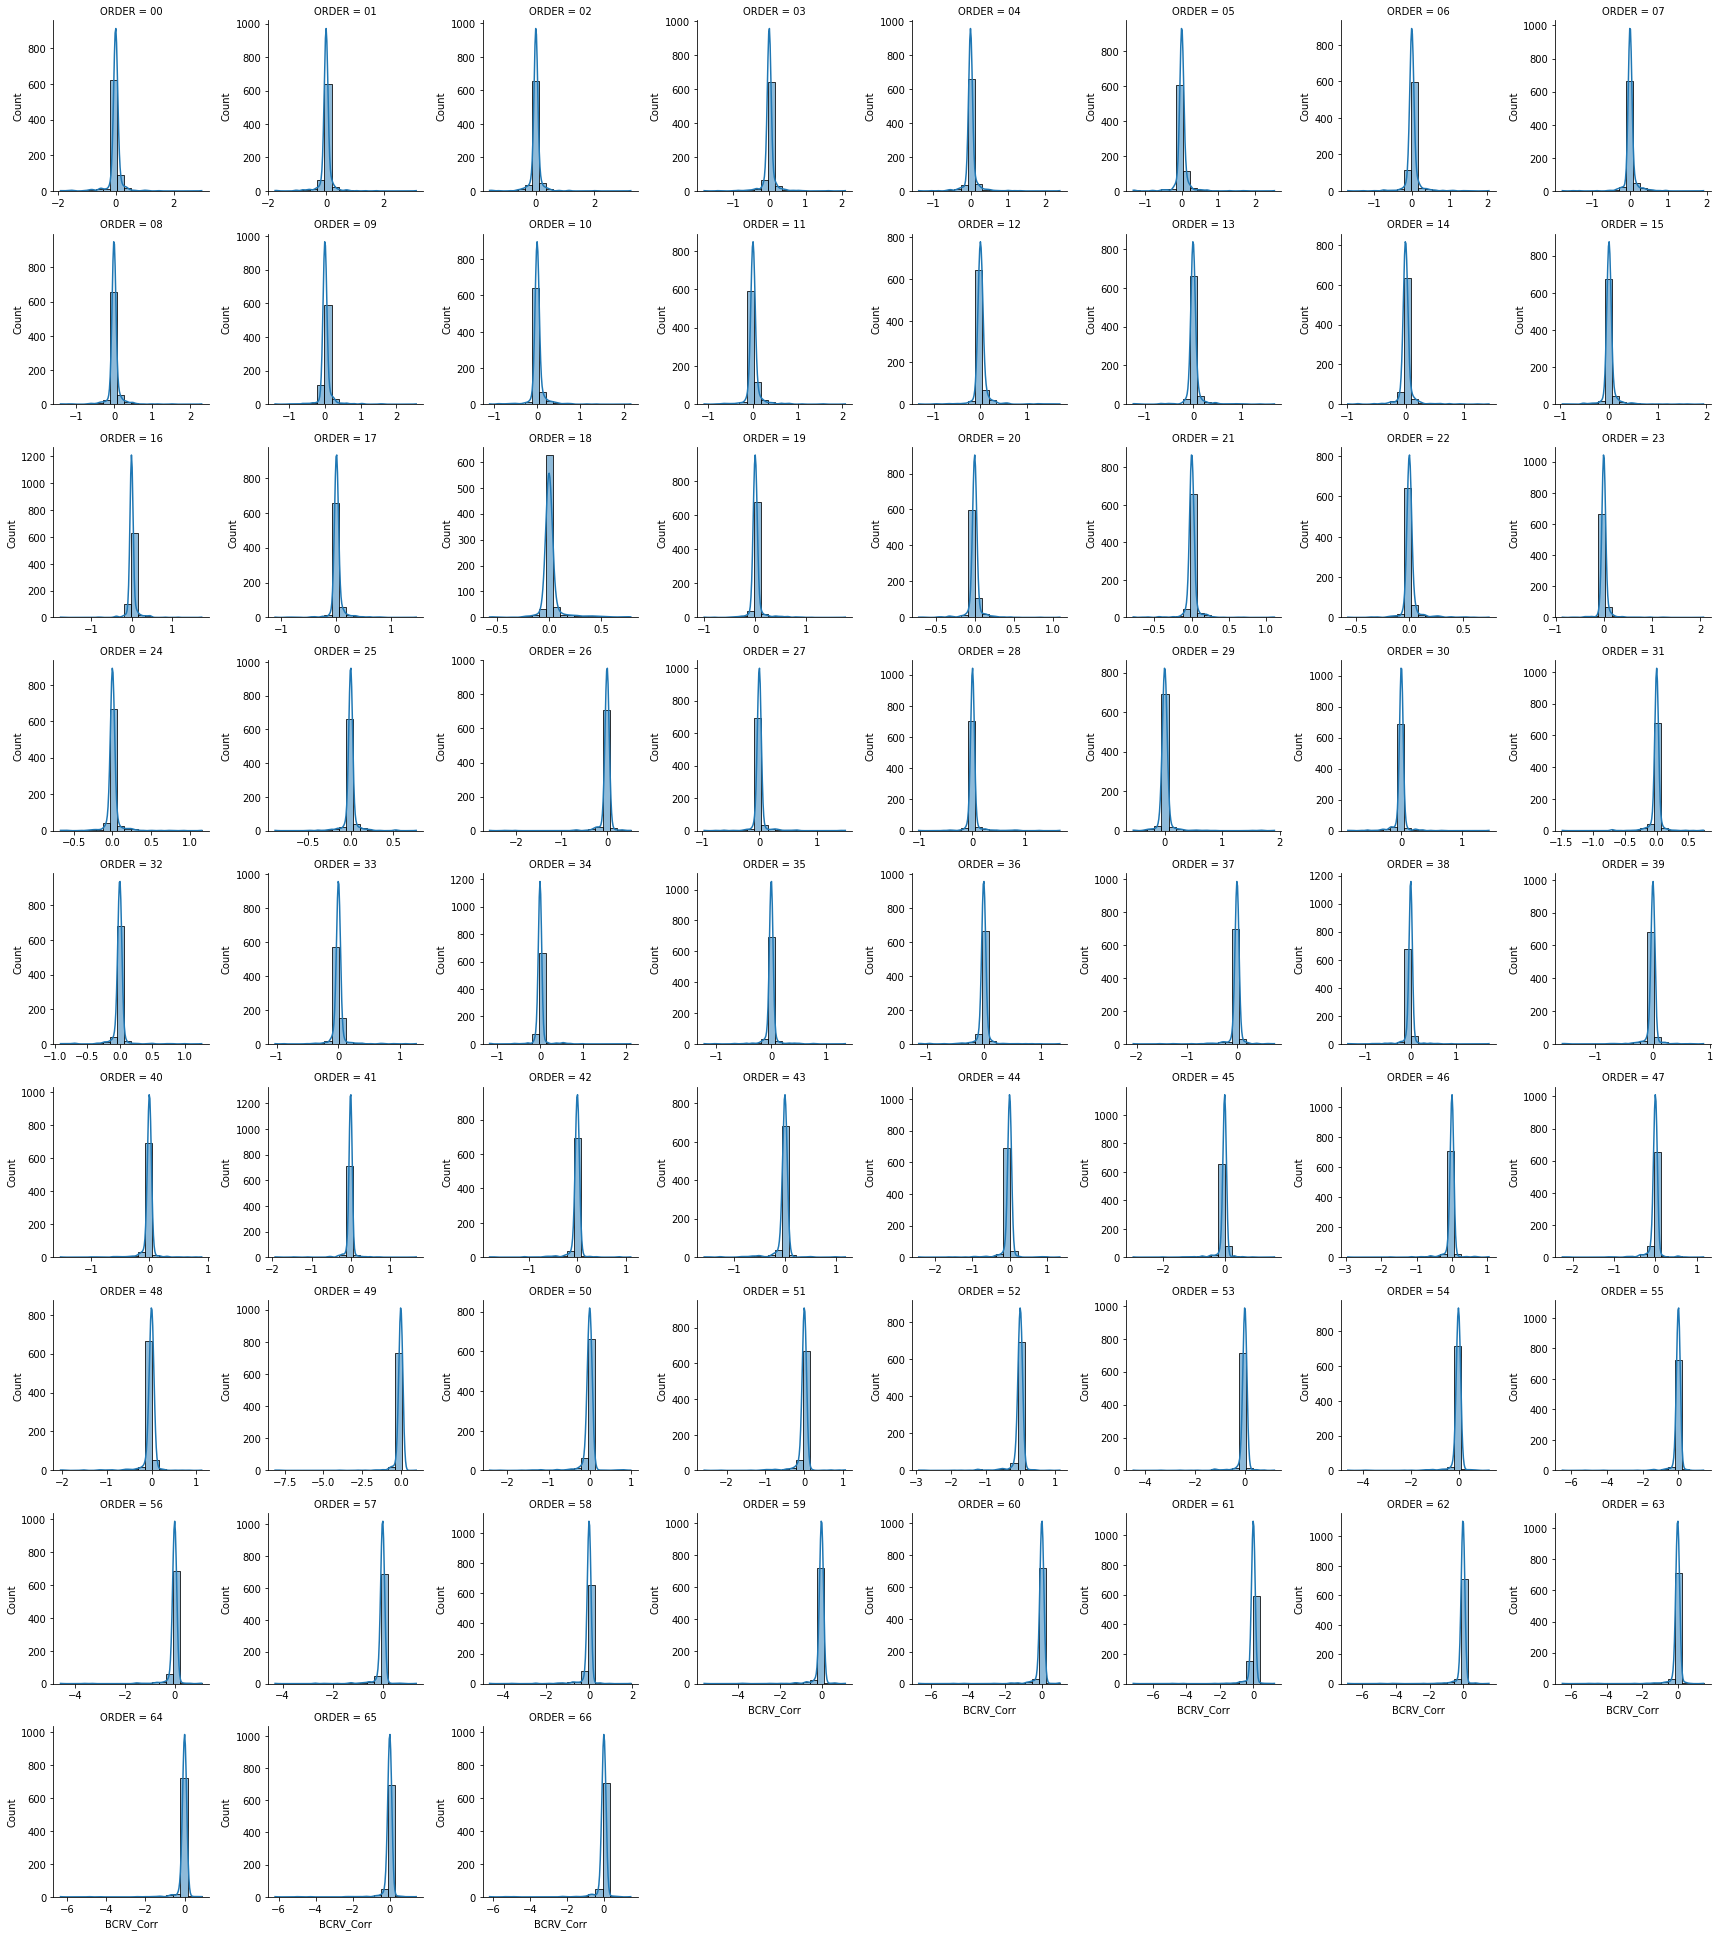

In [8]:
g = sns.FacetGrid(new_df, col="ORDER", col_wrap=8, sharex=False, sharey=False)
g.map(sns.histplot, "BCRV_Corr", bins=20, kde=True)

plt.show()

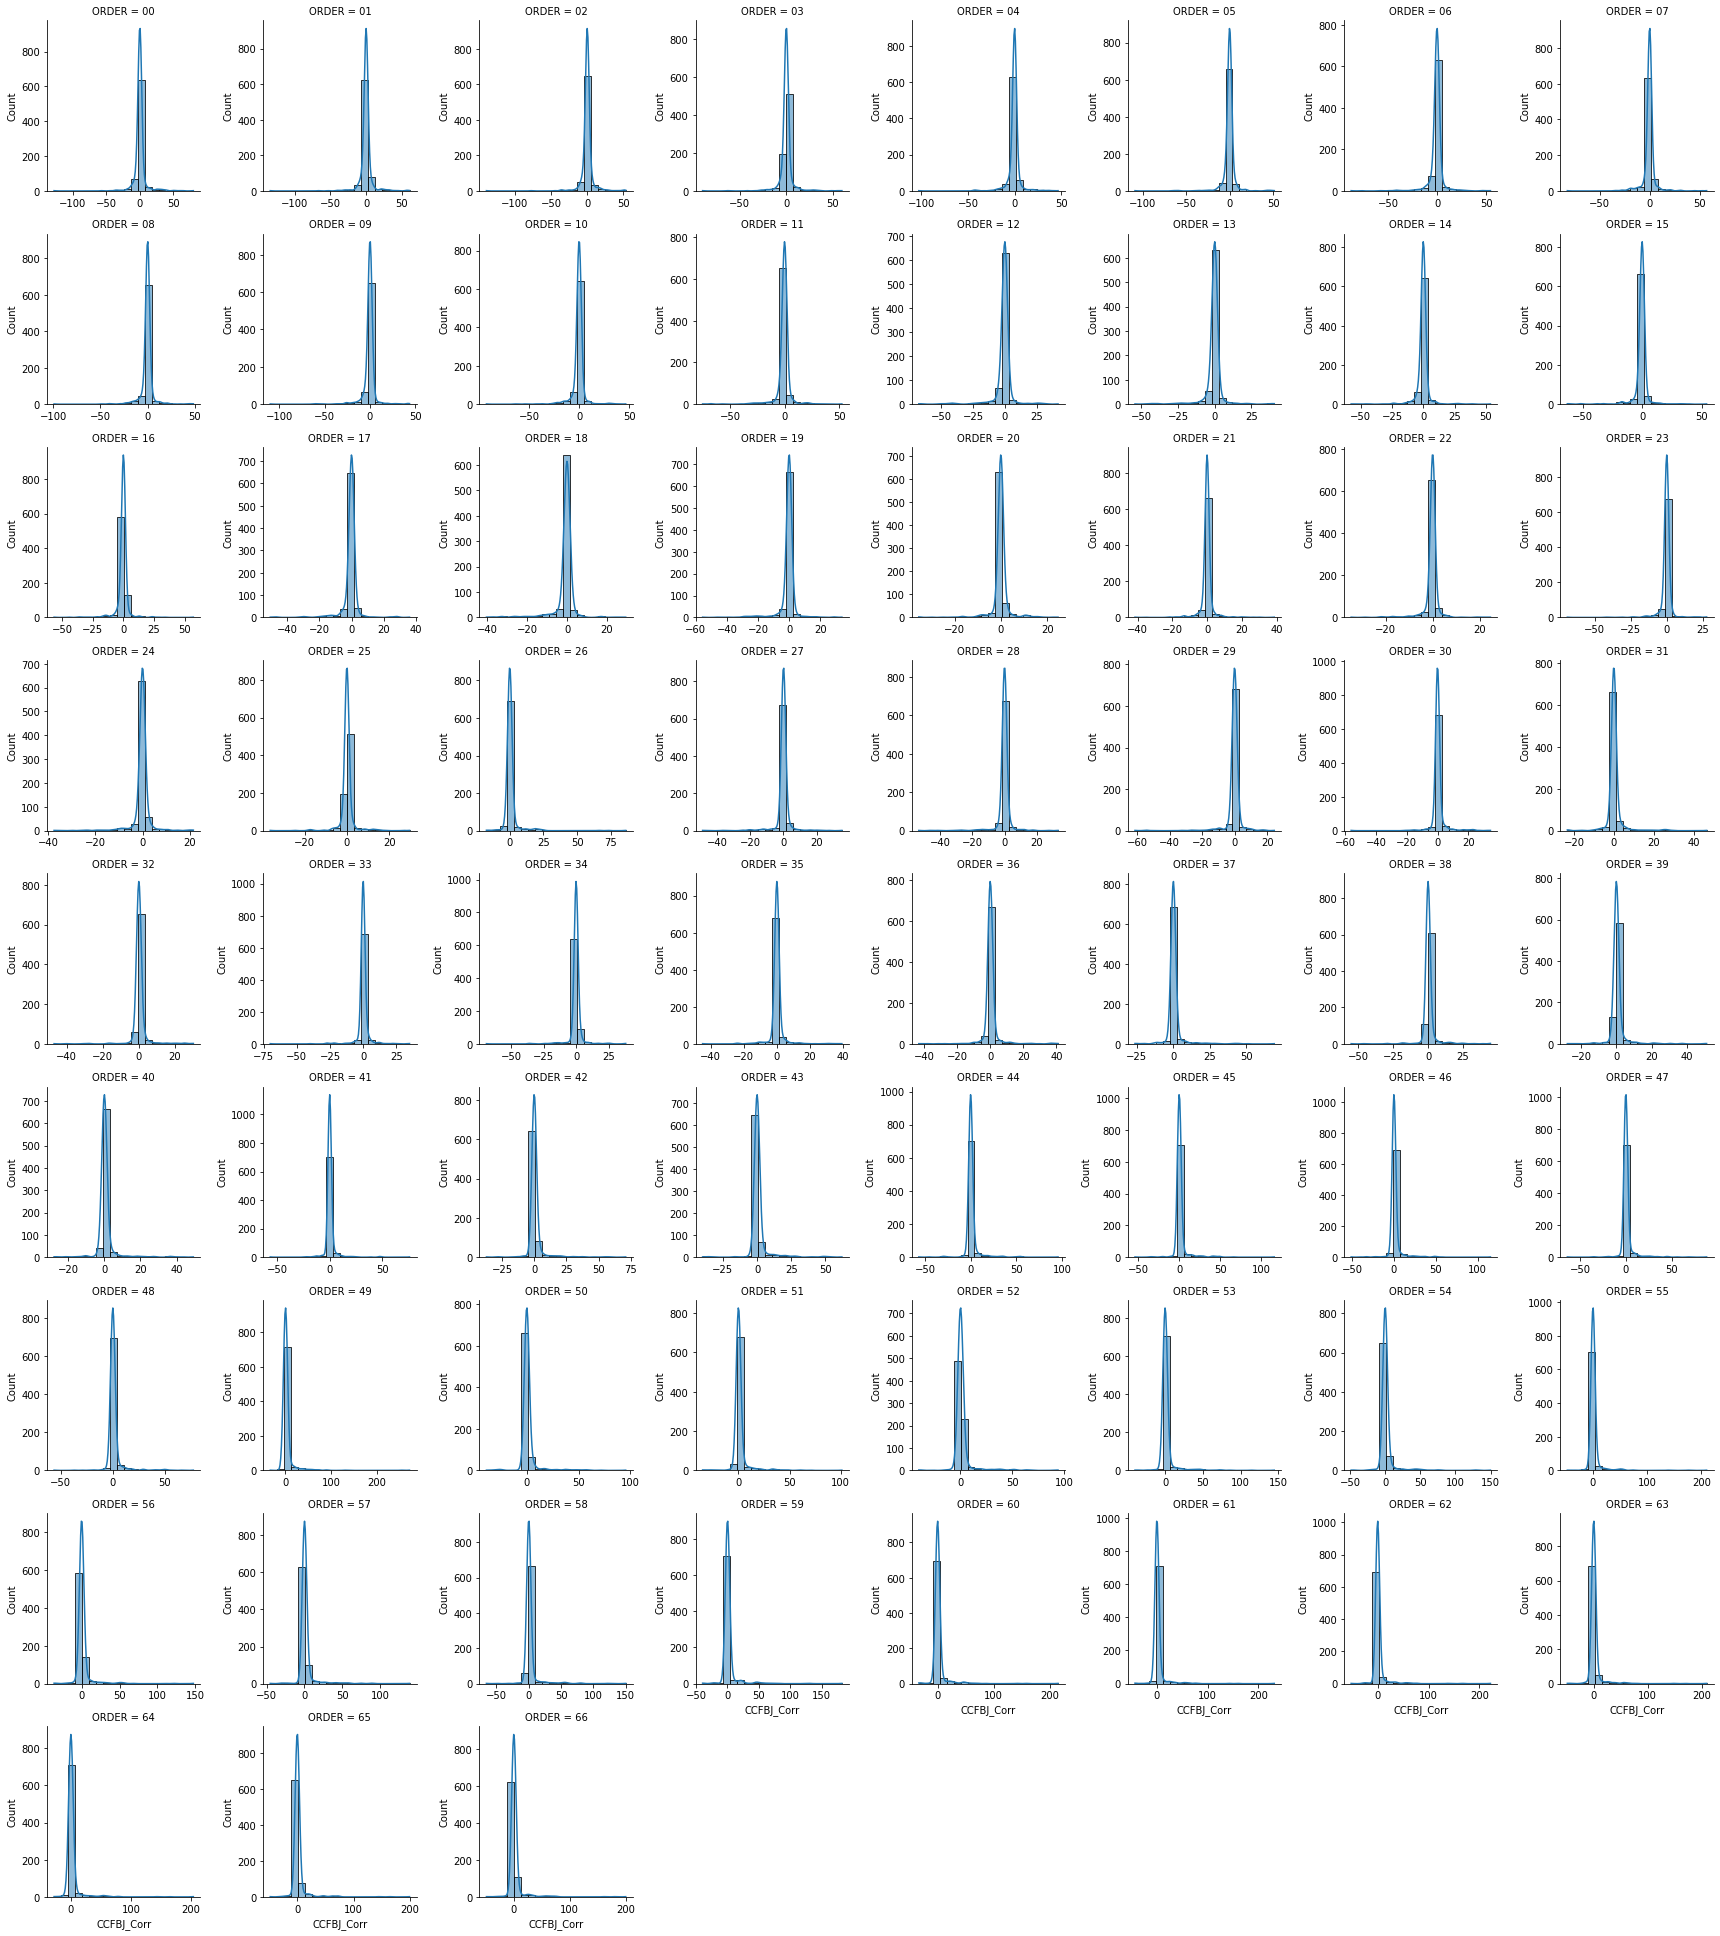

In [9]:
g = sns.FacetGrid(new_df, col="ORDER", col_wrap=8, sharex=False, sharey=False)
g.map(sns.histplot, "CCFBJ_Corr", bins=20, kde=True)

plt.show()

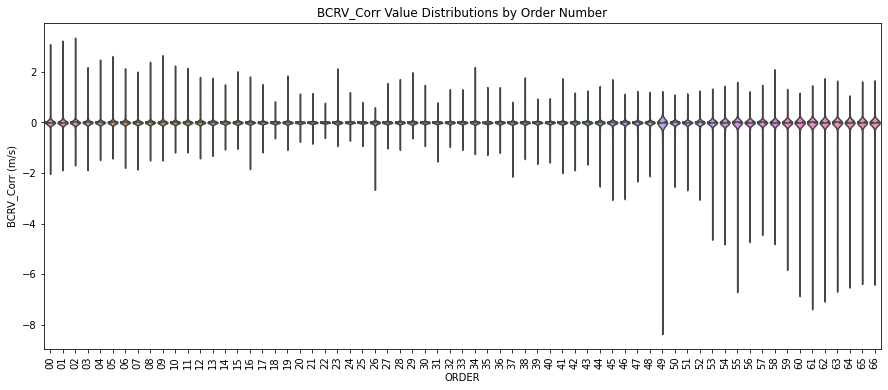

In [26]:
plt.figure(figsize=(15, 6))
sns.violinplot(x="ORDER", y="BCRV_Corr", data=new_df, scale="width", inner="quartile")
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.title("BCRV_Corr Value Distributions by Order Number")
plt.ylabel('BCRV_Corr (m/s)')
plt.show()

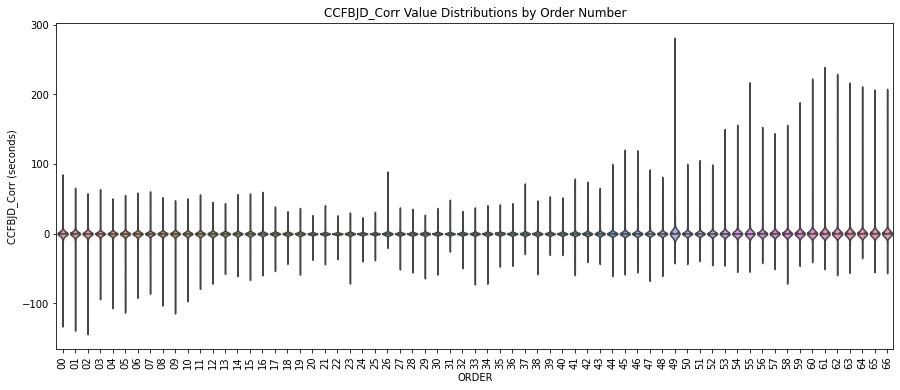

In [27]:
plt.figure(figsize=(15, 6))
sns.violinplot(x="ORDER", y="CCFBJ_Corr", data=new_df, scale="width", inner="quartile")
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.title("CCFBJD_Corr Value Distributions by Order Number")
plt.ylabel('CCFBJD_Corr (seconds)')
plt.show()

In [12]:
BJSortHigh = new_df.sort_values(by='CCFBJ_Corr', ascending=False)
BJSortHigh[['ORDER', 'CCFBJ_Corr', 'L0_filename']].head()

,ORDER,CCFBJ_Corr,L0_filename
35492,49,272.067565,KP.20241021.32152.40.fits
17871,49,253.891964,KP.20241013.33188.96.fits
17883,61,231.635316,KP.20241013.33188.96.fits
17884,62,221.719176,KP.20241013.33188.96.fits
17882,60,215.018870,KP.20241013.33188.96.fits


In [13]:
BJSortLow = new_df.sort_values(by='CCFBJ_Corr', ascending=True)
BJSortLow[['ORDER', 'CCFBJ_Corr', 'L0_filename']].head()

,ORDER,CCFBJ_Corr,L0_filename
51391,02,-139.282930,KP.20241026.44207.71.fits
51390,01,-134.105811,KP.20241026.44207.71.fits
51389,00,-127.798623,KP.20241026.44207.71.fits
51398,09,-110.052069,KP.20241026.44207.71.fits
51394,05,-108.687803,KP.20241026.44207.71.fits


In [14]:
BCVSortHigh = new_df.sort_values(by='BCRV_Corr', ascending=False)
BCVSortHigh[['ORDER', 'BCRV_Corr', 'L0_filename']].head()

,ORDER,BCRV_Corr,L0_filename
51391,02,3.237651,KP.20241026.44207.71.fits
51390,01,3.117932,KP.20241026.44207.71.fits
51389,00,2.971993,KP.20241026.44207.71.fits
51398,09,2.561033,KP.20241026.44207.71.fits
51394,05,2.529422,KP.20241026.44207.71.fits


In [15]:
BCVSortLow = new_df.sort_values(by='BCRV_Corr', ascending=True)
BCVSortLow[['ORDER', 'BCRV_Corr', 'L0_filename']].head()

,ORDER,BCRV_Corr,L0_filename
35492,49,-8.126149,KP.20241021.32152.40.fits
17871,49,-7.868057,KP.20241013.33188.96.fits
17883,61,-7.180727,KP.20241013.33188.96.fits
17884,62,-6.874370,KP.20241013.33188.96.fits
17882,60,-6.667291,KP.20241013.33188.96.fits
